In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

## DBSCAN

In [10]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

df = pd.read_csv('../../data/raw/training.csv', index_col=0)

X = df[['Latitude','Longitude']]
y = df['mobile_money_classification']

X.head()

,Latitude,Longitude
ID,,
5086,-4.460442,29.811396
1258,-6.176438,39.244871
331,-6.825702,37.652798
6729,-3.372049,35.808307
8671,-7.179645,31.039095


In [12]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

array([ 0,  1,  2, ...,  4,  6, 12])

In [14]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 34
Estimated number of noise points: 210
Homogeneity: 0.038
Completeness: 0.018
V-measure: 0.025
Adjusted Rand Index: 0.009
Adjusted Mutual Information: 0.015


/Users/renier.botha/anaconda3/envs/mobile_money/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


Silhouette Coefficient: 0.199


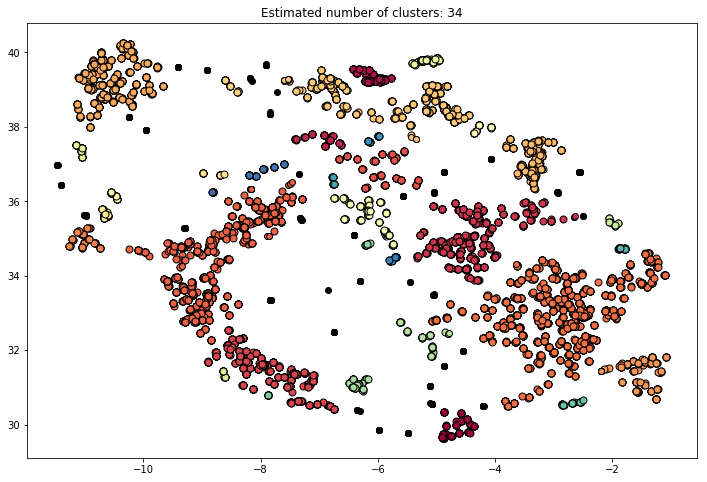

In [42]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(12,8))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask].values
    plt.plot(xy[:, 0], xy[:, 1], '.', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask].values
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### KMeans

In [39]:
from sklearn.cluster import KMeans

N = 10
kmeans = KMeans(n_clusters=N).fit(X)
id_label=kmeans.labels_

/Users/renier.botha/anaconda3/envs/mobile_money/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


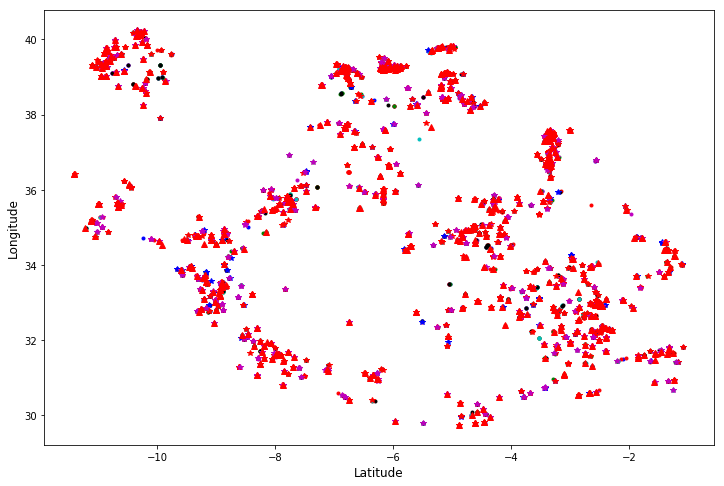

In [40]:
#plot result
ptsymb = np.array(['b.','r.','m.','g.','c.','k.','b*','r*','m*','r^']);

plt.figure(figsize=(12, 8))
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)

for i in range(N):
    cluster=np.where(id_label==i)[0]
    plt.plot(X['Latitude'][cluster].values,
             X['Longitude'][cluster].values,
             ptsymb[i])
plt.show()

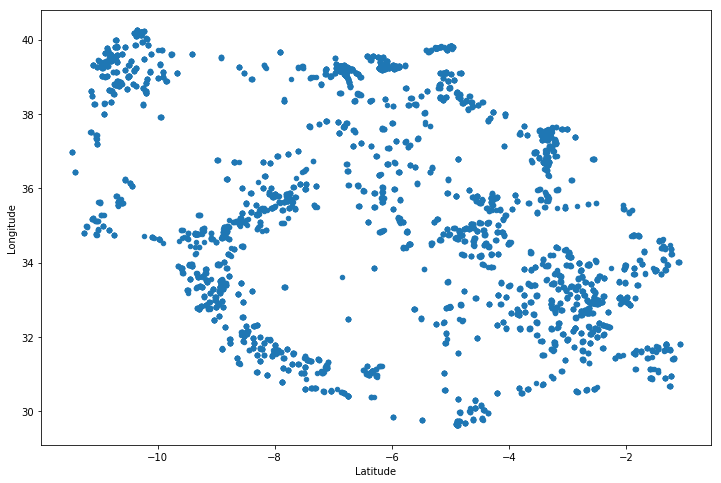

In [38]:
X.plot(x='Latitude', y='Longitude', figsize=(12,8), kind='scatter')